# Covid-19 Data Analysis

In [6]:
#Importing Files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\250228\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
#Importing dataset and displaying 1st 5 of them 
covid = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(covid)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [8]:
#3)
#Analysing Missing values
missing_values = df.isnull().sum()
print(missing_values)
df = df.dropna()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [9]:
#Converting 'Date' attribute to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
#Display number of Outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

confirmed_outliers = identify_outliers(df, 'Confirmed')
deaths_outliers = identify_outliers(df, 'Deaths')
recovered_outliers = identify_outliers(df, 'Recovered')
print(f"Confirmed outliers: {confirmed_outliers.shape[0]}")
print(f"Deaths outliers: {deaths_outliers.shape[0]}")
print(f"Recovered outliers: {recovered_outliers.shape[0]}")

Confirmed outliers: 24545
Deaths outliers: 25193
Recovered outliers: 31400


C:\Users\250228\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\250228\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\250228\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


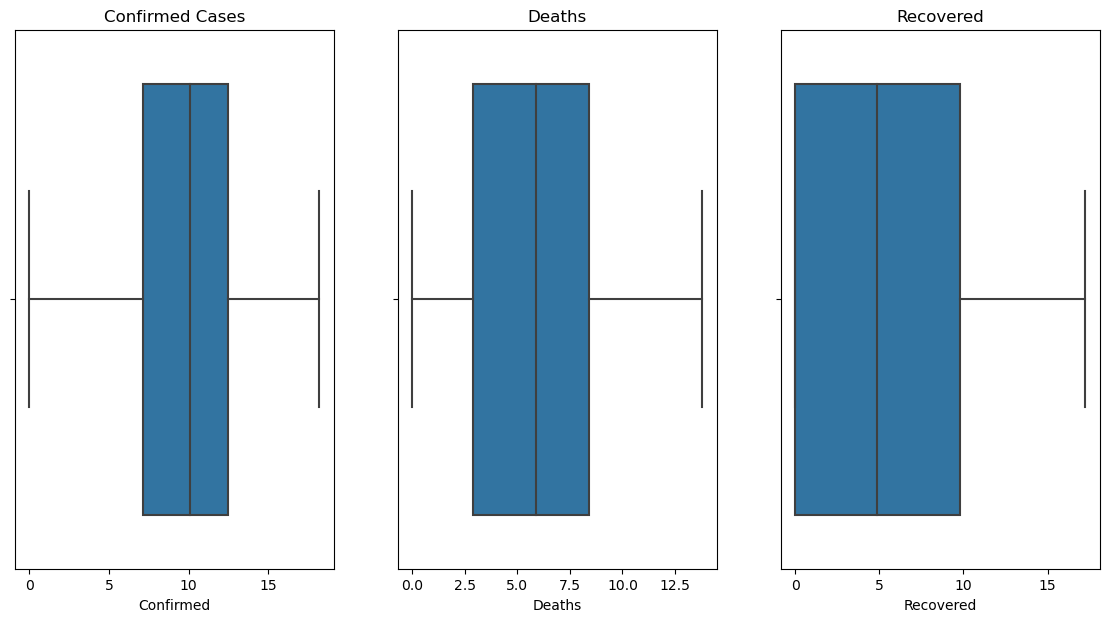

In [11]:
#Display box plot of Confirmed, Death and Recovered cases
df['Confirmed'] = np.log1p(df['Confirmed'])
df['Deaths'] = np.log1p(df['Deaths'])
df['Recovered'] = np.log1p(df['Recovered'])

plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
sns.boxplot(df['Confirmed'])
plt.title('Confirmed Cases')

plt.subplot(1, 3, 2)
sns.boxplot(df['Deaths'])
plt.title('Deaths')

plt.subplot(1, 3, 3)
sns.boxplot(df['Recovered'])
plt.title('Recovered')

plt.show()

In [12]:
#Removing Outliers
def remove_outliers(dfl, column):
    Q1 = dfl[column].quantile(0.25)
    Q3 = dfl[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers(df, 'Confirmed')
df_cleaned = remove_outliers(df_cleaned, 'Deaths')
df_cleaned = remove_outliers(df_cleaned, 'Recovered')

In [13]:
#data that may potentially be negative or cases where deaths+revoverd is more than confirmed is removed
df_cleaned = df_cleaned[(df_cleaned['Confirmed'] >= 0) & (df_cleaned['Deaths'] >= 0) & (df_cleaned['Recovered'] >= 0)]
df_cleaned = df_cleaned[df_cleaned['Confirmed'] >= (df_cleaned['Deaths'] + df_cleaned['Recovered'])]

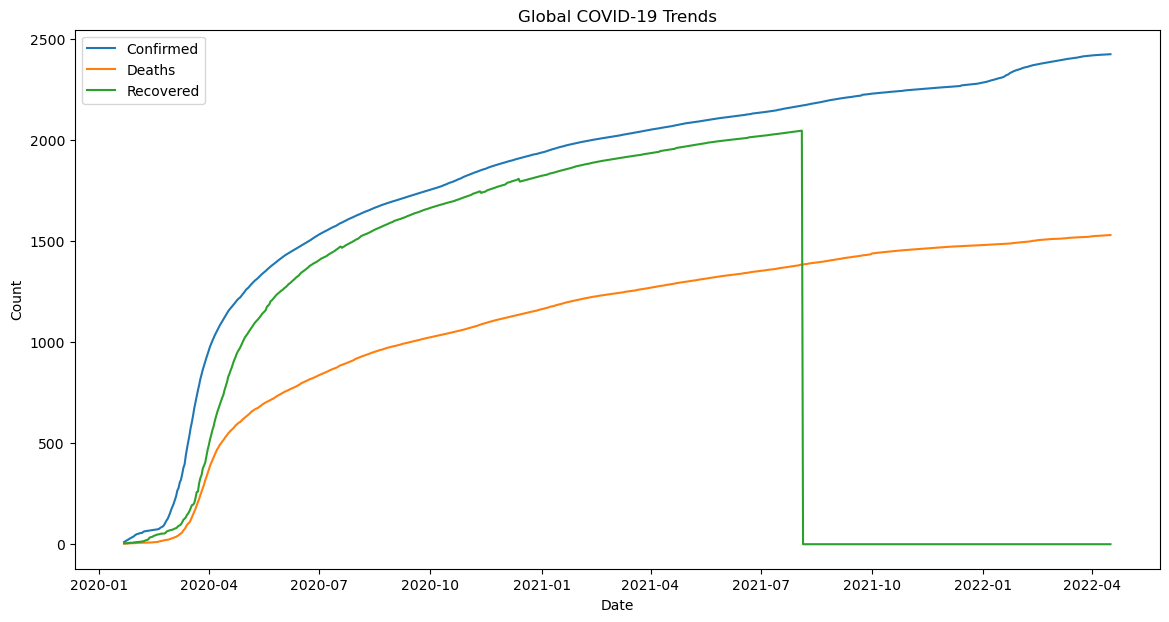

In [14]:
#A global comparison between Confirmed, Deaths and Recovered cases is plotted
plt.figure(figsize=(14, 7))
global_data = df.groupby('Date').sum().reset_index()
sns.lineplot(data=global_data, x='Date', y='Confirmed', label='Confirmed')
sns.lineplot(data=global_data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=global_data, x='Date', y='Recovered', label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()

Country: India


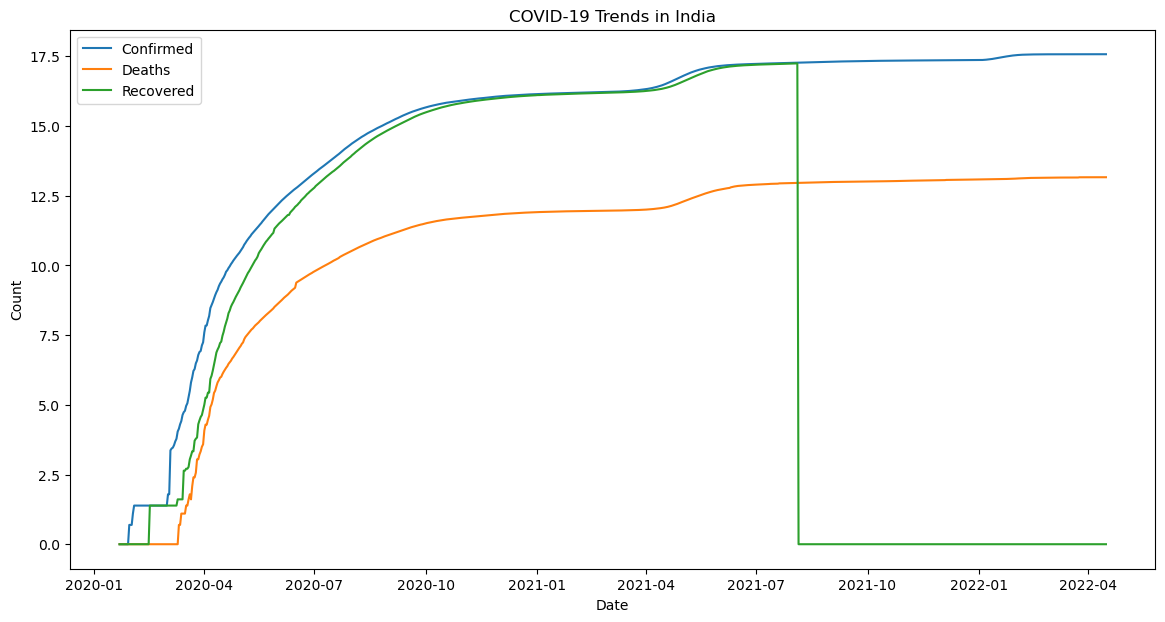

In [15]:
#A national level(India in this case) comparison between Confirmed, Deaths and Recovered cases is plotted
def plot_country_trends(country):
    country_df = df[df['Country'] == country]
    
    plt.figure(figsize=(14, 7))
    
    sns.lineplot(data=country_df, x='Date', y='Confirmed', label='Confirmed')
    sns.lineplot(data=country_df, x='Date', y='Deaths', label='Deaths')
    sns.lineplot(data=country_df, x='Date', y='Recovered', label='Recovered')
    
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

nation = input("Country: ")
plot_country_trends(nation)

Enter the names of the countries you want to compare, separated by commas: US, India, China


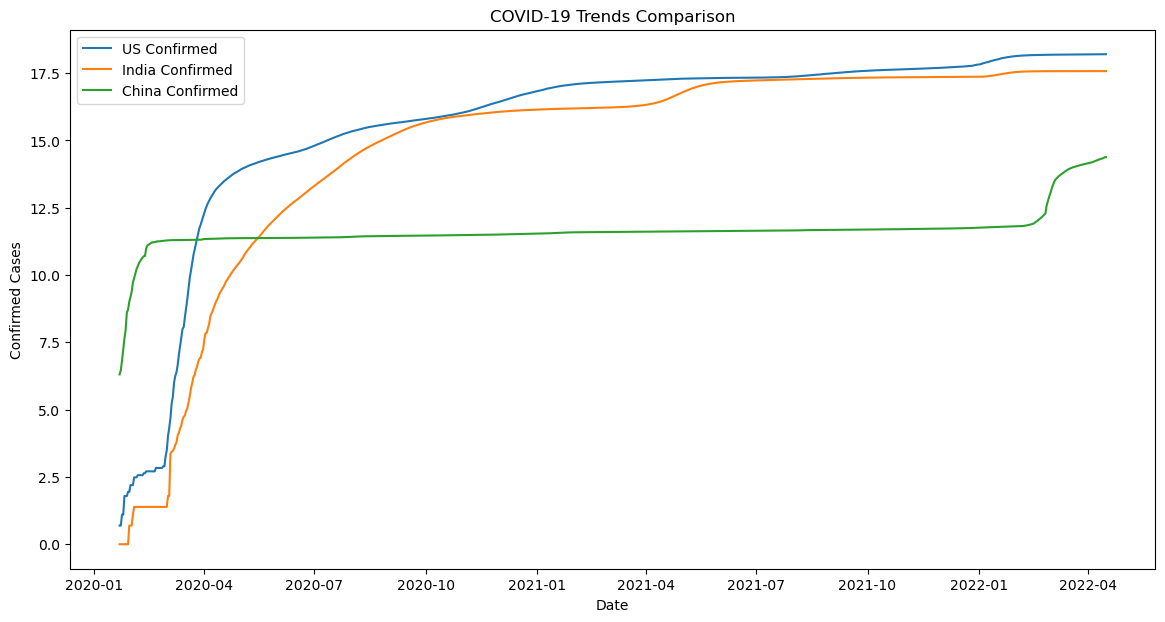

In [16]:
#Comparing confirmed cases of different countries(in this case, it's the US, India and China)
def compare_countries():
    countries = input("Enter the names of the countries you want to compare, separated by commas: ").split(',')
    countries = [country.strip() for country in countries]
  
    plt.figure(figsize=(14, 7))
    for country in countries:
        country_df = df[df['Country'] == country]
        sns.lineplot(data=country_df, x='Date', y='Confirmed', label=f'{country} Confirmed')
  
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title('COVID-19 Trends Comparison')
    plt.legend()
    plt.show()

compare_countries()

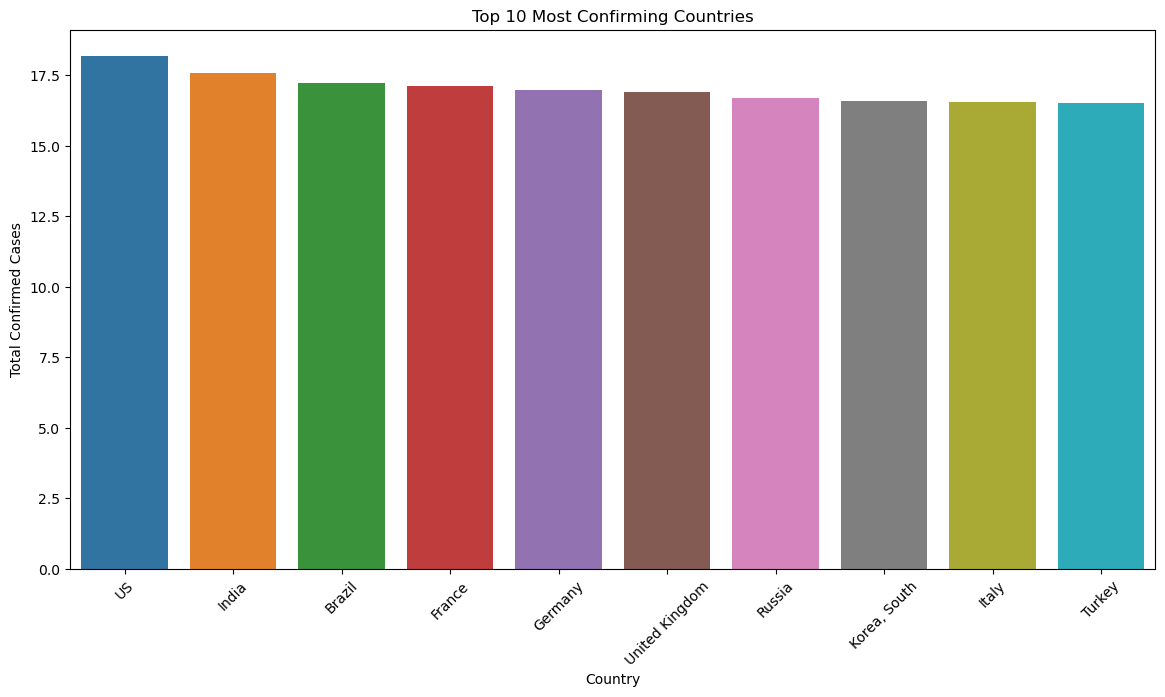

In [16]:
#Top 10 Countries with highest number of Confirmed Cases
top_10_countries_confirmed = df.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_countries_confirmed.index, y=top_10_countries_confirmed['Confirmed'])
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Top 10 Most Confirming Countries')
plt.xticks(rotation=45)
plt.show()

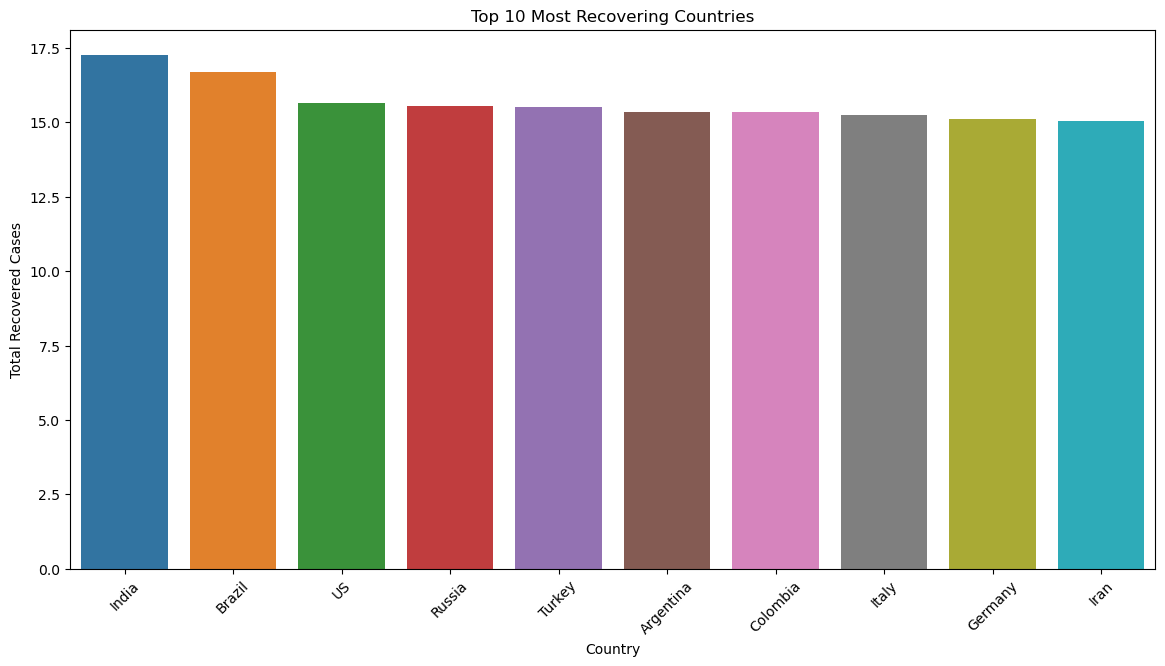

In [17]:
#Top 10 Countries with highest number of Recovered Cases
top_10_countries_recovered = df.groupby('Country').max().sort_values(by='Recovered', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_countries_recovered.index, y=top_10_countries_recovered['Recovered'])
plt.xlabel('Country')
plt.ylabel('Total Recovered Cases')
plt.title('Top 10 Most Recovering Countries')
plt.xticks(rotation=45)
plt.show()

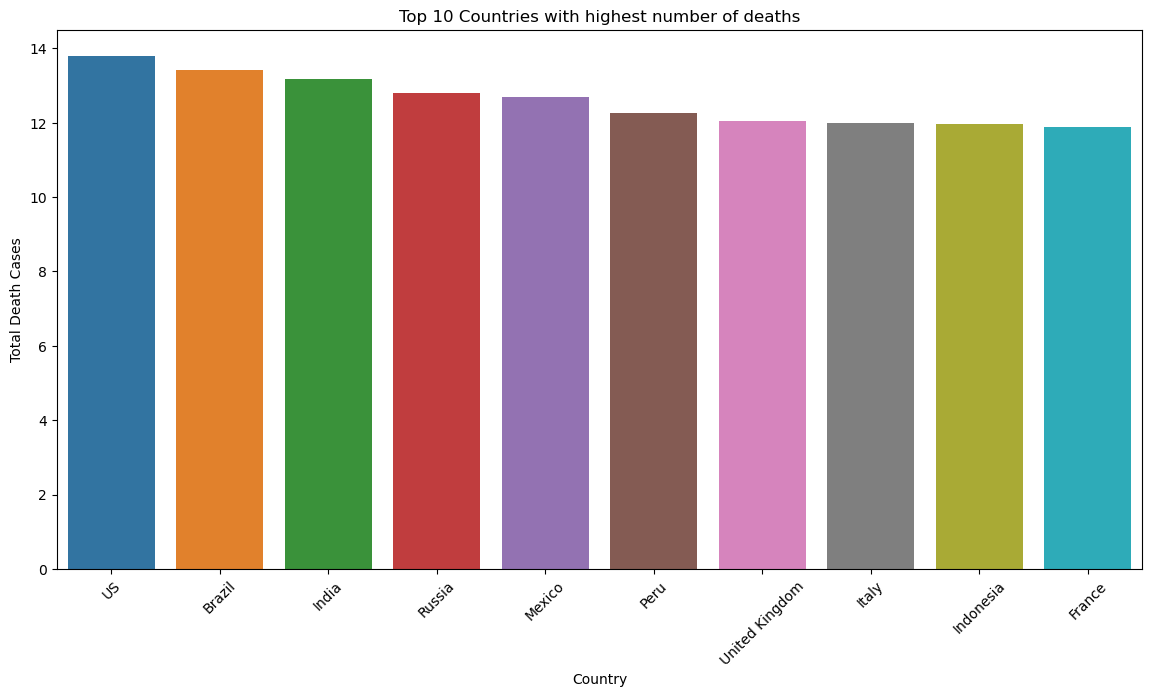

In [18]:
#Top 10 Countries with highest number of Death Cases
top_10_countries_deaths = df.groupby('Country').max().sort_values(by='Deaths', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_countries_deaths.index, y=top_10_countries_deaths['Deaths'])
plt.xlabel('Country')
plt.ylabel('Total Death Cases')
plt.title('Top 10 Countries with highest number of deaths')
plt.xticks(rotation=45)
plt.show()

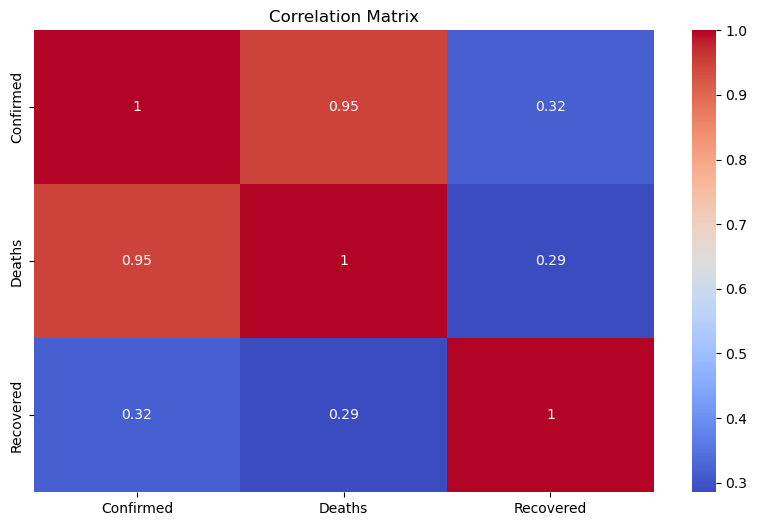

In [20]:
#Q7
#Corelation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

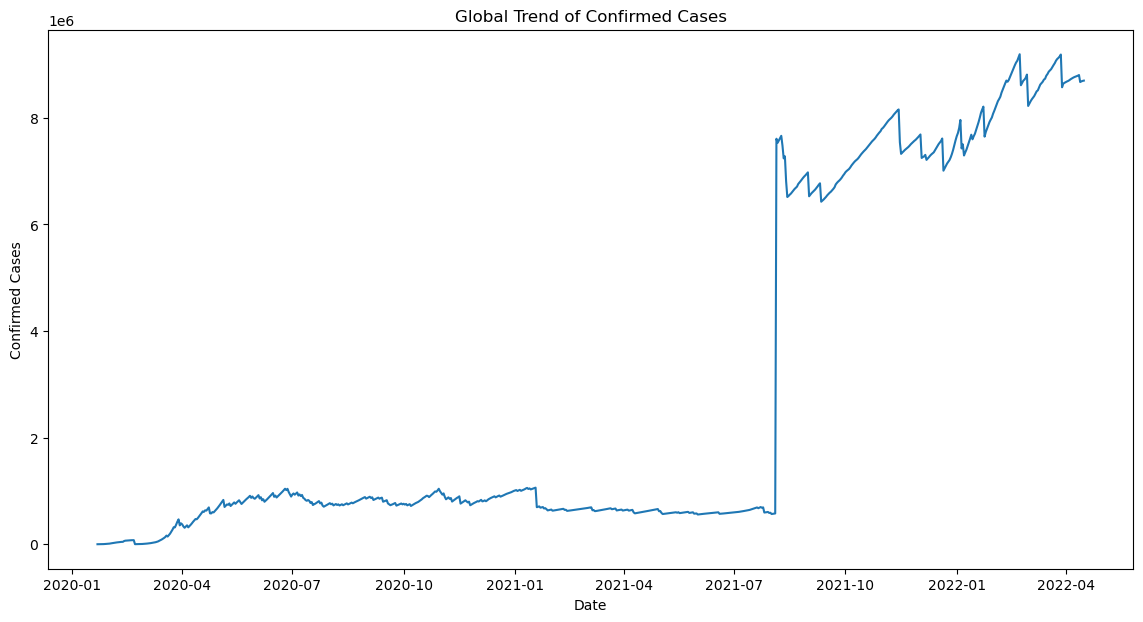

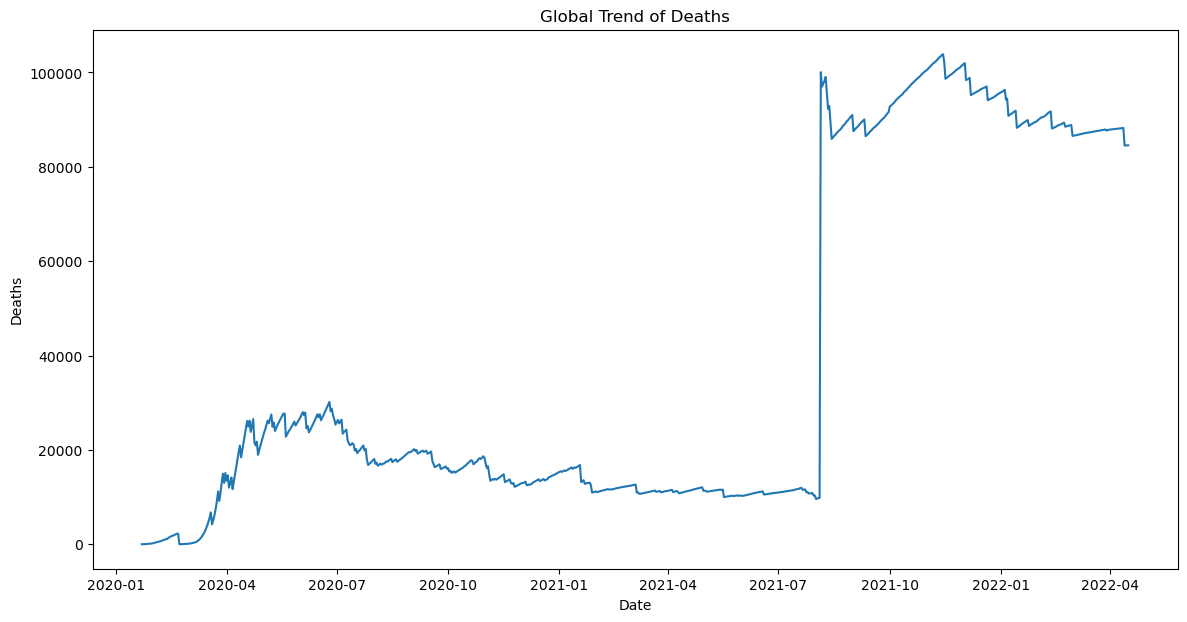

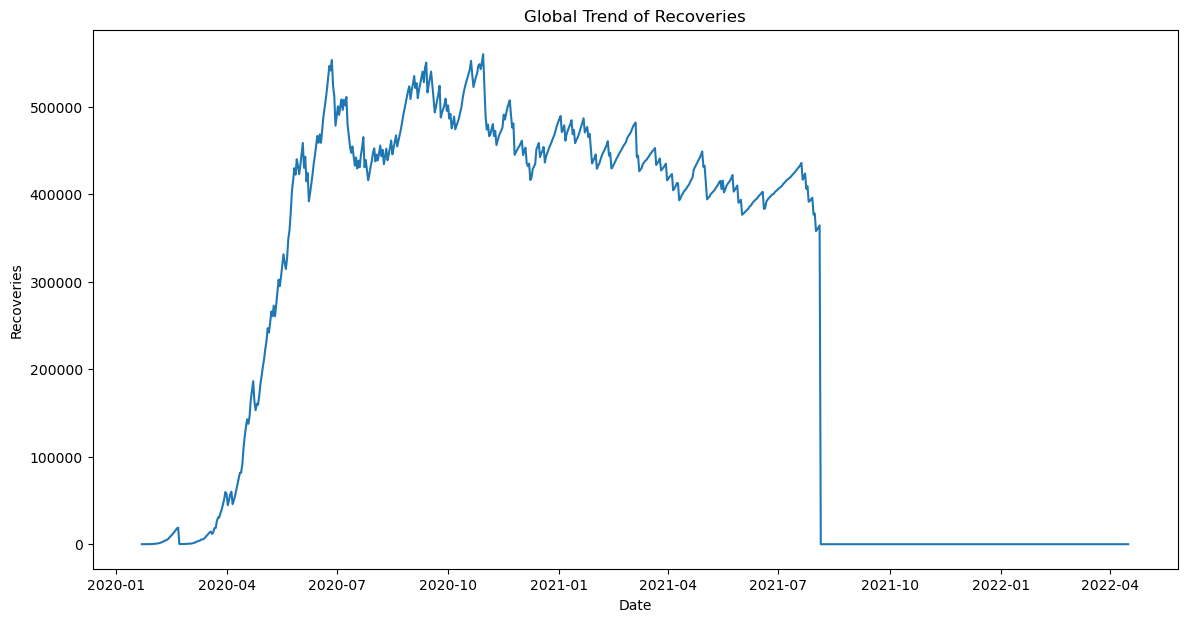

In [21]:
#Q1
global_data = df_cleaned.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, x='Date', y='Confirmed')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global Trend of Confirmed Cases')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, x='Date', y='Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Global Trend of Deaths')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_data, x='Date', y='Recovered')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.title('Global Trend of Recoveries')
plt.show()

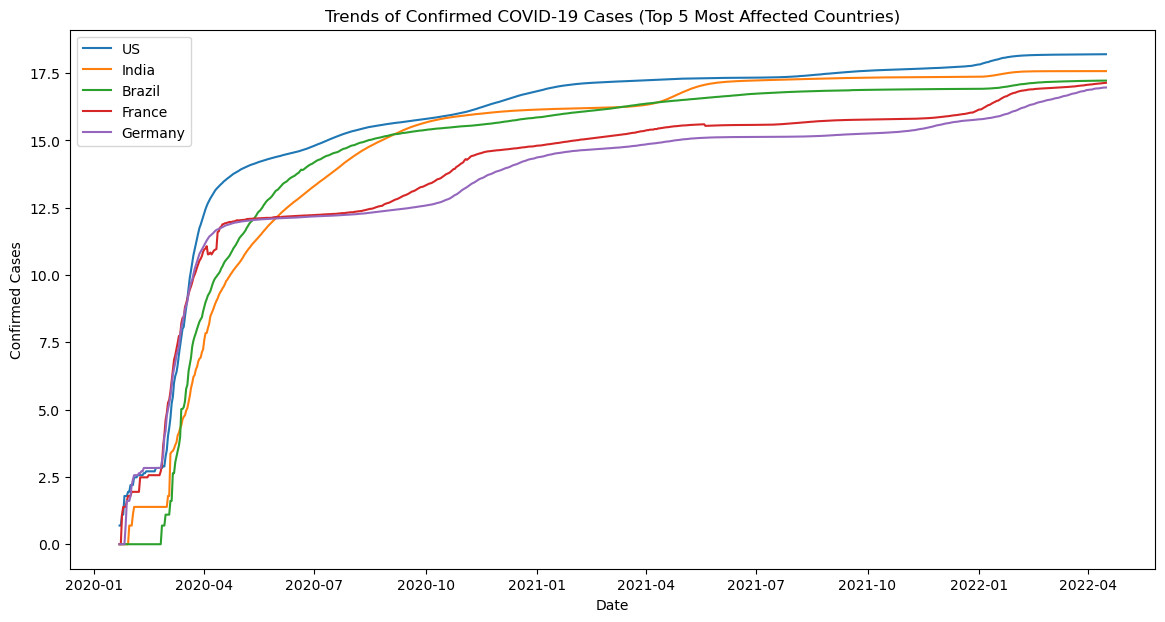

In [22]:
#Q3
total_confirmed = df.groupby('Country')['Confirmed'].max().reset_index()
top_5_countries = total_confirmed.sort_values(by='Confirmed', ascending=False).head(5)['Country'].tolist()
top_5_data = df[df['Country'].isin(top_5_countries)]
plt.figure(figsize=(14, 7))
for country in top_5_countries:
    country_df = top_5_data[top_5_data['Country'] == country]
    sns.lineplot(data=country_df, x='Date', y='Confirmed', label=f'{country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Trends of Confirmed COVID-19 Cases (Top 5 Most Affected Countries)')
plt.legend()
plt.show()

In [23]:
#Q2
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]
country_max_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax(), 'Country']
country_max_deaths = latest_data.loc[latest_data['Deaths'].idxmax(), 'Country']
country_max_recoveries = latest_data.loc[latest_data['Recovered'].idxmax(), 'Country']
print(f"Country with the highest confirmed cases: {country_max_confirmed}")
print(f"Country with the highest deaths: {country_max_deaths}")
print(f"Country with the highest recoveries: {country_max_recoveries}")

Country with the highest confirmed cases: US
Country with the highest deaths: US
Country with the highest recoveries: Afghanistan


Global COVID-19 Growth Rates:
Confirmed cases growth rate: 1.58%
Deaths growth rate: 1.47%
Recoveries growth rate: 2.76%


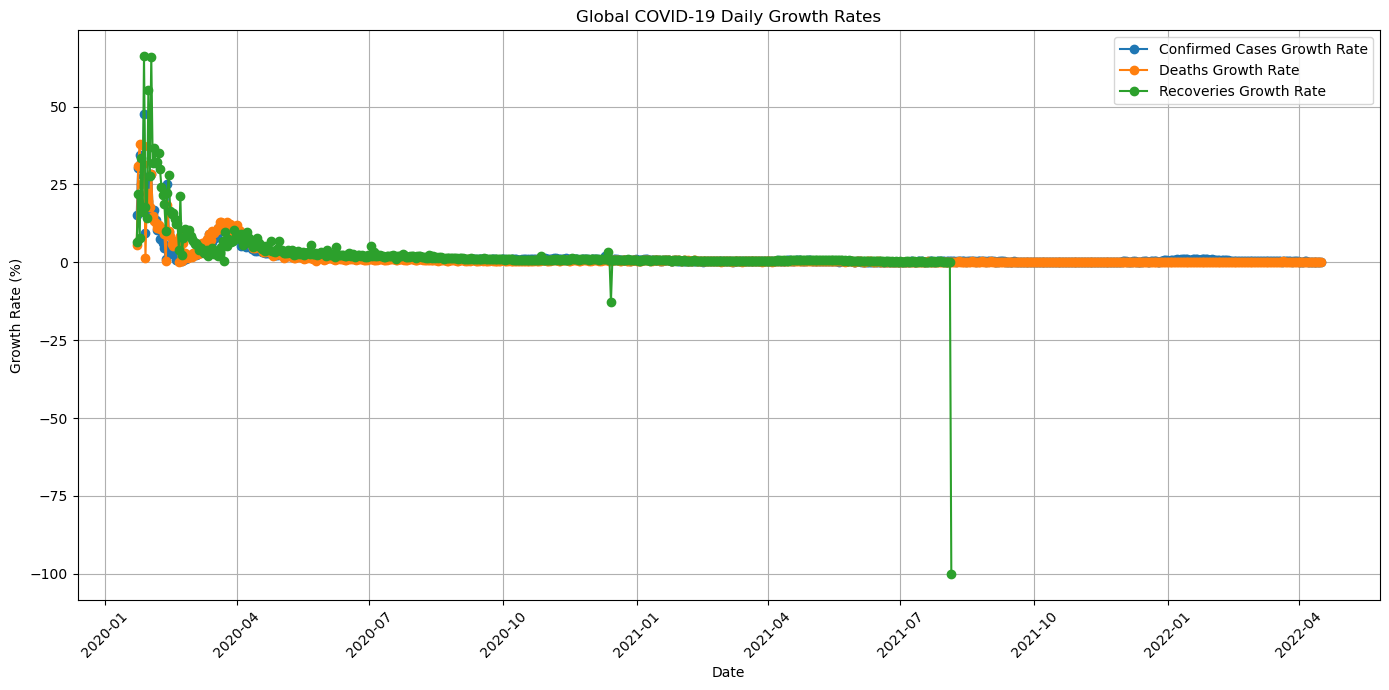

In [36]:
#Q4
df['Date'] = pd.to_datetime(df['Date'])
global_data = df.groupby('Date').sum().reset_index()
global_data['Confirmed_change'] = global_data['Confirmed'].diff()
global_data['Deaths_change'] = global_data['Deaths'].diff()
global_data['Recovered_change'] = global_data['Recovered'].diff()
global_data['Confirmed_growth_rate'] = global_data['Confirmed_change'] / global_data['Confirmed'] * 100
global_data['Deaths_growth_rate'] = global_data['Deaths_change'] / global_data['Deaths'] * 100
global_data['Recovered_growth_rate'] = global_data['Recovered_change'] / global_data['Recovered'].shift(1) * 100
global_data['Recovered_growth_rate'].replace([np.inf, -np.inf], 0, inplace=True)
print("Global COVID-19 Growth Rates:")
print(f"Confirmed cases growth rate: {global_data['Confirmed_growth_rate'].mean():.2f}%")
print(f"Deaths growth rate: {global_data['Deaths_growth_rate'].mean():.2f}%")
print(f"Recoveries growth rate: {global_data['Recovered_growth_rate'].mean():.2f}%")

plt.figure(figsize=(14, 7))

plt.plot(global_data['Date'], global_data['Confirmed_growth_rate'], label='Confirmed Cases Growth Rate', marker='o')
plt.plot(global_data['Date'], global_data['Deaths_growth_rate'], label='Deaths Growth Rate', marker='o')
plt.plot(global_data['Date'], global_data['Recovered_growth_rate'], label='Recoveries Growth Rate', marker='o')

plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Global COVID-19 Daily Growth Rates')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

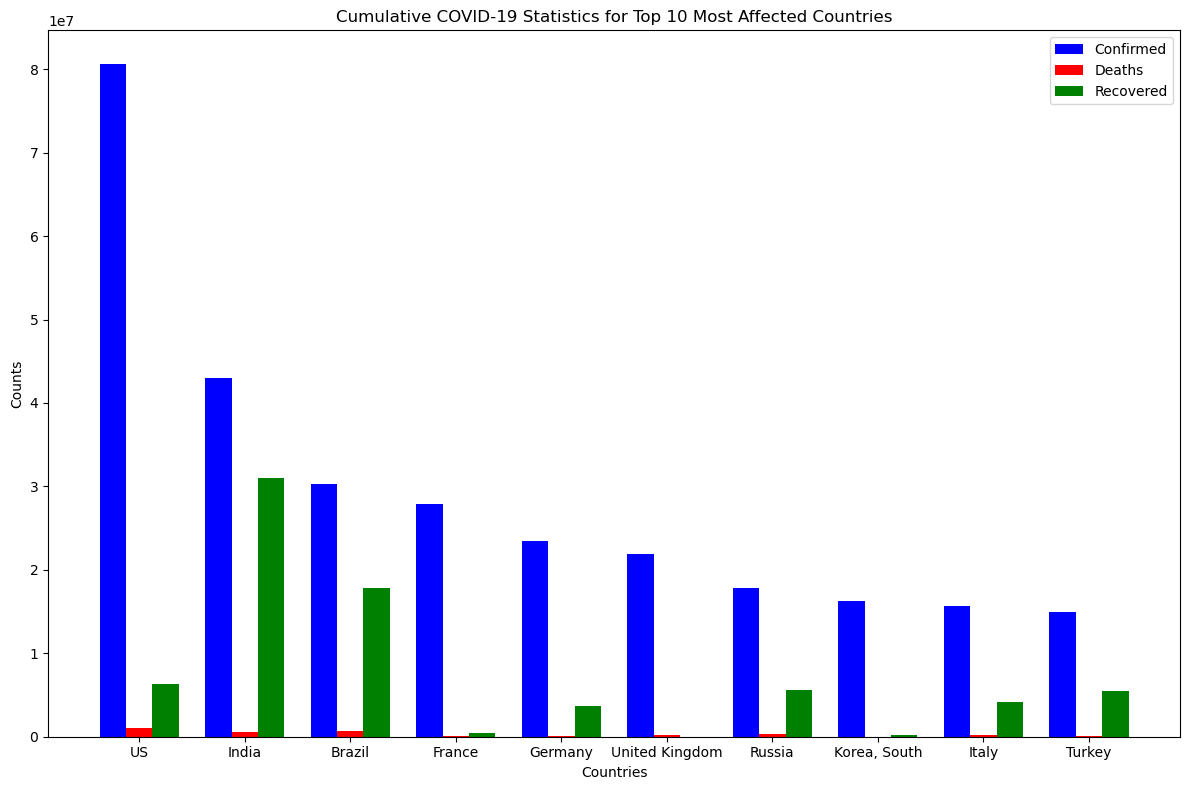

In [30]:
#Q5
df['Date'] = pd.to_datetime(df['Date'])
country_totals = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].max().reset_index()
top_10_countries = country_totals.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(top_10_countries))
plt.bar(index, top_10_countries['Confirmed'], width=bar_width, label='Confirmed', color='blue')
plt.bar([i + bar_width for i in index], top_10_countries['Deaths'], width=bar_width, label='Deaths', color='red')
plt.bar([i + 2 * bar_width for i in index], top_10_countries['Recovered'], width=bar_width, label='Recovered', color='green')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.title('Cumulative COVID-19 Statistics for Top 10 Most Affected Countries')
plt.xticks([i + bar_width for i in index], top_10_countries['Country'])
plt.legend()
plt.tight_layout()
plt.show()

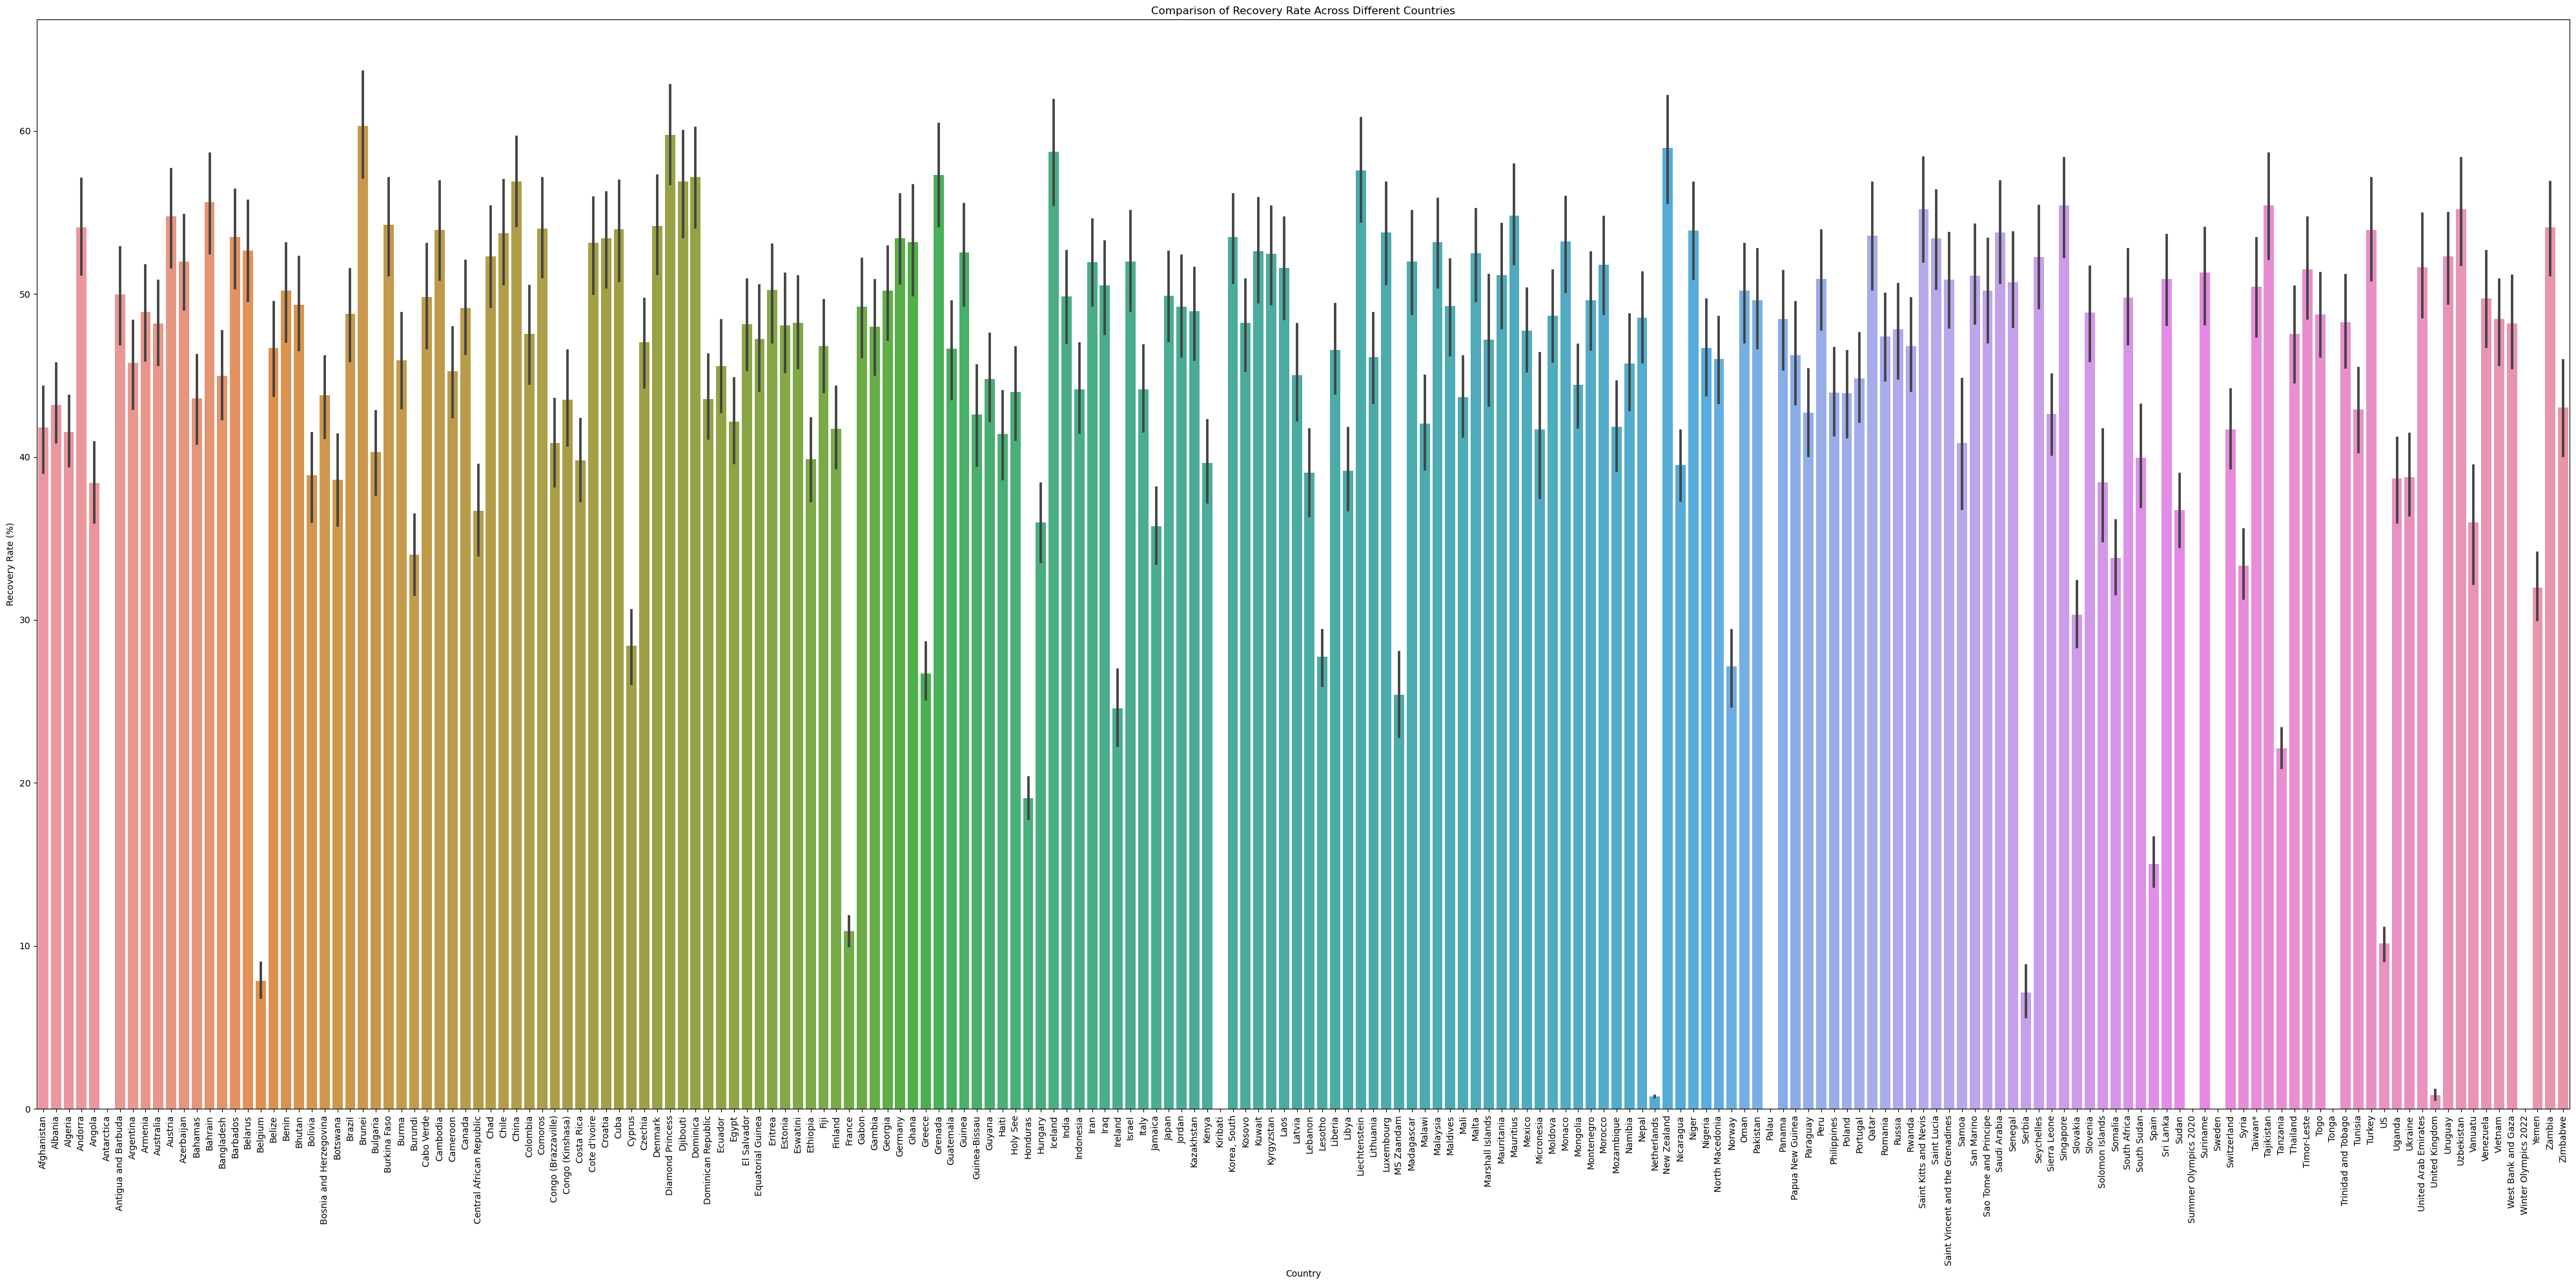

In [38]:
#Q6
df['Date'] = pd.to_datetime(df['Date'])
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100
plt.figure(figsize=(40, 20))
sns.barplot(data=df, x='Country', y='Recovery Rate')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.title('Comparison of Recovery Rate Across Different Countries')
plt.tight_layout()
plt.show()

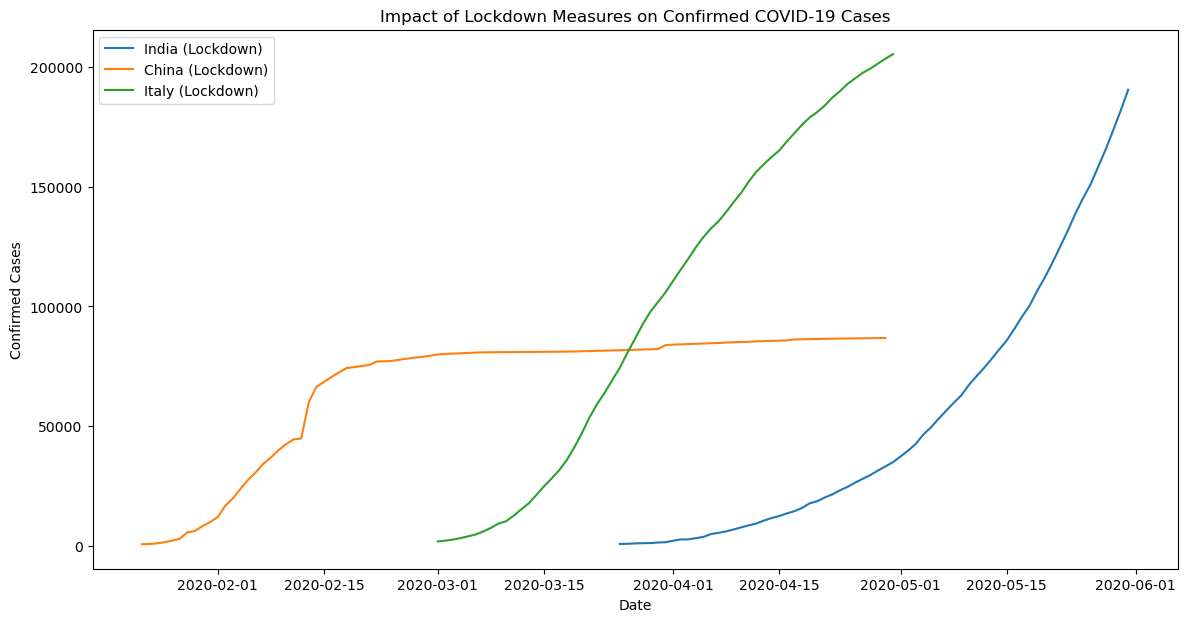

In [40]:
#Q8
india_lockdown_start = pd.to_datetime('2020-03-25')
india_lockdown_end = pd.to_datetime('2020-05-31')
india_data = df[(df['Country'] == 'India') & (df['Date'] >= india_lockdown_start) & (df['Date'] <= india_lockdown_end)]

china_lockdown_start = pd.to_datetime('2020-01-01')
china_lockdown_end = pd.to_datetime('2020-04-29')
china_data = df[(df['Country'] == 'China') & (df['Date'] >= china_lockdown_start) & (df['Date'] <= china_lockdown_end)]

italy_lockdown_start = pd.to_datetime('2020-03-01')
italy_lockdown_end = pd.to_datetime('2020-04-30')
italy_data = df[(df['Country'] == 'Italy') & (df['Date'] >= italy_lockdown_start) & (df['Date'] <= italy_lockdown_end)]

plt.figure(figsize=(14, 7))

sns.lineplot(data=india_data, x='Date', y='Confirmed', label='India (Lockdown)')
sns.lineplot(data=china_data, x='Date', y='Confirmed', label='China (Lockdown)')ly (Lockdown)')

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Impact of Lockdown Measures on Confirmed COVID-19 Cases')
plt.legend()
plt.show()

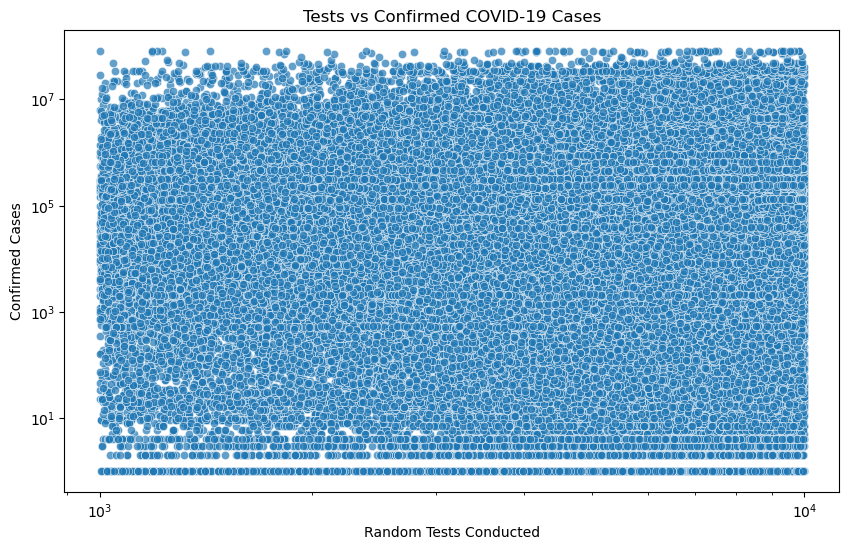

In [29]:
#Q9
np.random.seed(42)
df['Tests'] = np.random.randint(1000, 10000, size=len(df))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tests', y='Confirmed', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.title('Tests vs Confirmed COVID-19 Cases')
plt.xlabel('Random Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.show()


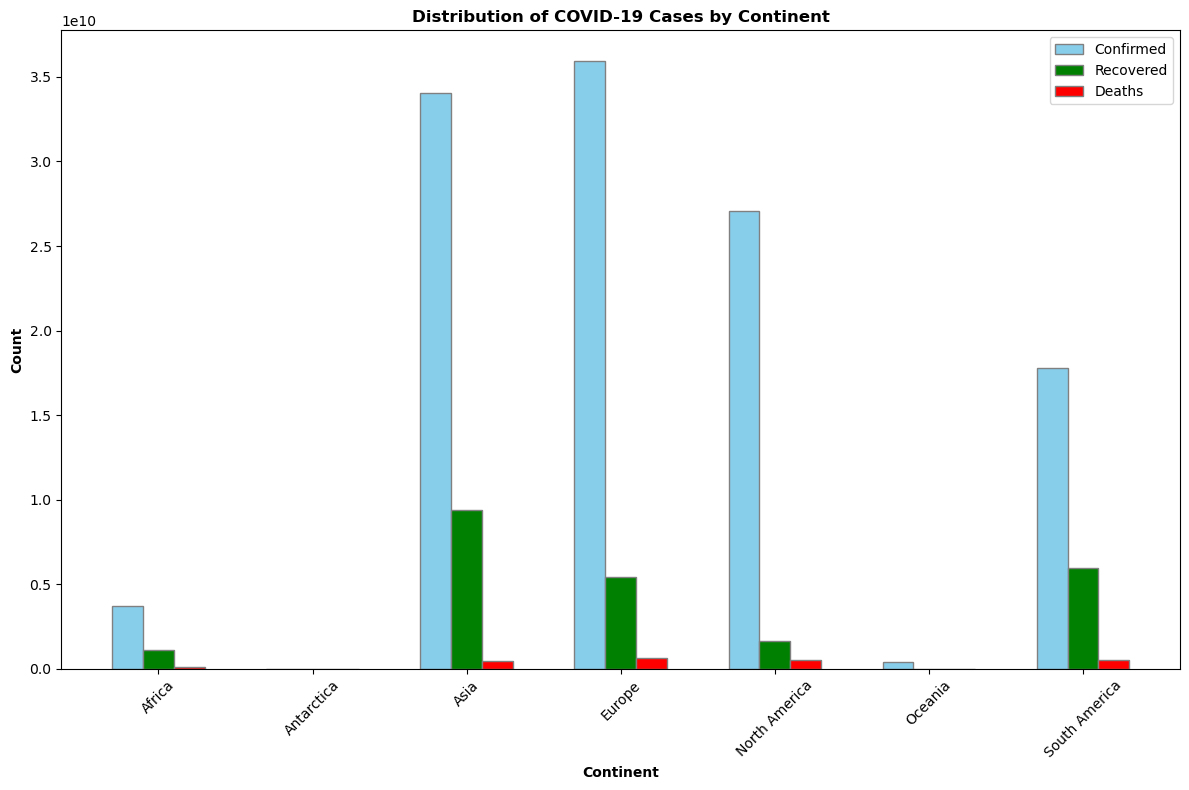

In [12]:
#Q10
country_to_continent = {
    'Tajikistan': 'Asia',
    'Kenya': 'Africa',
    'Mauritius': 'Africa',
    'Finland': 'Europe',
    'Croatia': 'Europe',
    'Suriname': 'South America',
    'US': 'North America',
    'Portugal': 'Europe',
    'Ghana': 'Africa',
    'Norway': 'Europe',
    'Monaco': 'Europe',
    'Iraq': 'Asia',
    'Australia': 'Oceania',
    'Latvia': 'Europe',
    'Tunisia': 'Africa',
    'Saudi Arabia': 'Asia',
    'Bahamas': 'North America',
    'Cambodia': 'Asia',
    'Eswatini': 'Africa',
    'Mauritania': 'Africa',
    'Sweden': 'Europe',
    'United Arab Emirates': 'Asia',
    'Bosnia and Herzegovina': 'Europe',
    'Denmark': 'Europe',
    'Panama': 'North America',
    'Romania': 'Europe',
    'Armenia': 'Asia',
    'Guatemala': 'North America',
    'Nigeria': 'Africa',
    'Cyprus': 'Europe',
    'Jamaica': 'North America',
    'Afghanistan': 'Asia',
    'Cote d\'Ivoire': 'Africa',
    'Korea, South': 'Asia',
    'El Salvador': 'North America',
    'Bulgaria': 'Europe',
    'Palau': 'Oceania',
    'Turkey': 'Asia',
    'Ireland': 'Europe',
    'Montenegro': 'Europe',
    'Burundi': 'Africa',
    'Winter Olympics 2022': 'Asia',
    'Lithuania': 'Europe',
    'Guyana': 'South America',
    'Greece': 'Europe',
    'Mexico': 'North America',
    'Kiribati': 'Oceania',
    'Bahrain': 'Asia',
    'Serbia': 'Europe',
    'Venezuela': 'South America',
    'Nicaragua': 'North America',
    'Namibia': 'Africa',
    'Rwanda': 'Africa',
    'Netherlands': 'Europe',
    'Honduras': 'North America',
    'South Africa': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Belgium': 'Europe',
    'Eritrea': 'Africa',
    'Iceland': 'Europe',
    'Russia': 'Europe',
    'Slovakia': 'Europe',
    'Brazil': 'South America',
    'Fiji': 'Oceania',
    'Cabo Verde': 'Africa',
    'Luxembourg': 'Europe',
    'Peru': 'South America',
    'MS Zaandam': 'North America',
    'Guinea-Bissau': 'Africa',
    'Czechia': 'Europe',
    'Liechtenstein': 'Europe',
    'Sri Lanka': 'Asia',
    'Indonesia': 'Asia',
    'Equatorial Guinea': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Diamond Princess': 'Asia',
    'Laos': 'Asia',
    'Samoa': 'Oceania',
    'Paraguay': 'South America',
    'Andorra': 'Europe',
    'Ukraine': 'Europe',
    'Nepal': 'Asia',
    'Spain': 'Europe',
    'Libya': 'Africa',
    'Moldova': 'Europe',
    'Oman': 'Asia',
    'Morocco': 'Africa',
    'Vanuatu': 'Oceania',
    'Italy': 'Europe',
    'Timor-Leste': 'Asia',
    'Madagascar': 'Africa',
    'Qatar': 'Asia',
    'Bolivia': 'South America',
    'Lesotho': 'Africa',
    'Gabon': 'Africa',
    'Malawi': 'Africa',
    'France': 'Europe',
    'Germany': 'Europe',
    'Holy See': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'West Bank and Gaza': 'Asia',
    'Philippines': 'Asia',
    'Saint Lucia': 'North America',
    'Papua New Guinea': 'Oceania',
    'Kazakhstan': 'Asia',
    'Sudan': 'Africa',
    'Bangladesh': 'Asia',
    'Mali': 'Africa',
    'Vietnam': 'Asia',
    'Malta': 'Europe',
    'Seychelles': 'Africa',
    'Comoros': 'Africa',
    'South Sudan': 'Africa',
    'Argentina': 'South America',
    'Saint Kitts and Nevis': 'North America',
    'Summer Olympics 2020': 'Asia',
    'Taiwan*': 'Asia',
    'Lebanon': 'Asia',
    'Botswana': 'Africa',
    'Gambia': 'Africa',
    'Iran': 'Asia',
    'Sierra Leone': 'Africa',
    'Slovenia': 'Europe',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Japan': 'Asia',
    'Uzbekistan': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Somalia': 'Africa',
    'Estonia': 'Europe',
    'Saint Vincent and the Grenadines': 'North America',
    'Thailand': 'Asia',
    'Mongolia': 'Asia',
    'Pakistan': 'Asia',
    'Niger': 'Africa',
    'Central African Republic': 'Africa',
    'Colombia': 'South America',
    'Belarus': 'Europe',
    'Congo (Kinshasa)': 'Africa',
    'Belize': 'North America',
    'Azerbaijan': 'Asia',
    'Tonga': 'Oceania',
    'Canada': 'North America',
    'Albania': 'Europe',
    'Grenada': 'North America',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'United Kingdom': 'Europe',
    'Congo (Brazzaville)': 'Africa',
    'Brunei': 'Asia',
    'Haiti': 'North America',
    'Maldives': 'Asia',
    'Zimbabwe': 'Africa',
    'Costa Rica': 'North America',
    'North Macedonia': 'Europe',
    'Poland': 'Europe',
    'Solomon Islands': 'Oceania',
    'Togo': 'Africa',
    'San Marino': 'Europe',
    'Cuba': 'North America',
    'Senegal': 'Africa',
    'Antarctica': 'Antarctica',
    'Djibouti': 'Africa',
    'Liberia': 'Africa',
    'Angola': 'Africa',
    'Ecuador': 'South America',
    'Uganda': 'Africa',
    'Jordan': 'Asia',
    'Ethiopia': 'Africa',
    'Marshall Islands': 'Oceania',
    'New Zealand': 'Oceania',
    'Micronesia': 'Oceania',
    'Switzerland': 'Europe',
    'Barbados': 'North America',
    'Bhutan': 'Asia',
    'Burma': 'Asia',
    'Dominica': 'North America',
    'Burkina Faso': 'Africa',
    'Hungary': 'Europe',
    'Cameroon': 'Africa',
    'Georgia': 'Asia',
    'Benin': 'Africa',
    'Chile': 'South America',
    'Dominican Republic': 'North America',
    'Uruguay': 'South America',
    'Mozambique': 'Africa',
    'India': 'Asia',
    'China': 'Asia',
    'Tanzania': 'Africa',
    'Chad': 'Africa',
    'Israel': 'Asia',
    'Malaysia': 'Asia',
    'Syria': 'Asia',
    'Singapore': 'Asia',
    'Egypt': 'Africa',
    'Algeria': 'Africa',
    'Austria': 'Europe',
    'Guinea': 'Africa'
}

df['Continent'] = df['Country'].map(country_to_continent)
r1 = range(len(continent_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, continent_data['Confirmed'], color='skyblue', width=bar_width, edgecolor='grey', label='Confirmed')
plt.bar(r2, continent_data['Recovered'], color='green', width=bar_width, edgecolor='grey', label='Recovered')
plt.bar(r3, continent_data['Deaths'], color='red', width=bar_width, edgecolor='grey', label='Deaths')

plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(continent_data))], continent_data['Continent'])
plt.title('Distribution of COVID-19 Cases by Continent', fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()